# Applied Programming Coding Challenge #1

![title](../img/photo-1533788179956-82e8a027c962.jpg)

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn import linear_model
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import explained_variance_score
from sklearn.metrics import max_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_squared_log_error
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor

In [2]:
%matplotlib inline

In [3]:
import warnings
from sklearn.exceptions import DataConversionWarning
warnings.filterwarnings(action='ignore', category=DataConversionWarning)

## 1 Load data

In [4]:
# Original columns
col_instant='instant'
col_datetime='datetime'
col_season='season'
col_year='year'
col_month='month'
col_hour='hour'
col_holiday='holiday'
col_weekday='weekday'
col_workingday='workingday'
col_weather_situation='weather_situation'
col_temperature='temperature'
col_apparent_temperature='apparent_temperature'
col_humidity='humidity'
col_windspeed='windspeed'

# Target columns
col_casual='casual'
col_registered='registered'
col_count='count'

# Calculated columns
col_temperature_raw='temperature_raw'
col_apparent_temperature_raw='apparent_temperature_raw'
col_humidity_raw='humidity_raw'
col_windspeed_raw='windspeed_raw'
col_temperature_raw_rounded='temperature_raw_rounded'

col_days_since_start='days_since_start'

# Define attribute names
attribute_names_day = [col_instant, col_datetime, col_season, col_year, col_month, col_holiday, col_weekday, col_workingday, col_weather_situation,
                       col_temperature, col_apparent_temperature, col_humidity, col_windspeed, col_casual, col_registered, col_count]

# Read csv files
data_bike_day = pd.read_csv("../data/bike-sharing-dataset/day.csv", skiprows=1, names=attribute_names_day)

## 2 Understand data

### 2.1 Show basic facts

* Show data types of features
* Make sure there are no null values

In [5]:
data_bike_day.info()
data_bike_day.isnull().sum()
# data_bike_day.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
instant                 731 non-null int64
datetime                731 non-null object
season                  731 non-null int64
year                    731 non-null int64
month                   731 non-null int64
holiday                 731 non-null int64
weekday                 731 non-null int64
workingday              731 non-null int64
weather_situation       731 non-null int64
temperature             731 non-null float64
apparent_temperature    731 non-null float64
humidity                731 non-null float64
windspeed               731 non-null float64
casual                  731 non-null int64
registered              731 non-null int64
count                   731 non-null int64
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


instant                 0
datetime                0
season                  0
year                    0
month                   0
holiday                 0
weekday                 0
workingday              0
weather_situation       0
temperature             0
apparent_temperature    0
humidity                0
windspeed               0
casual                  0
registered              0
count                   0
dtype: int64

### 2.2 Visualize raw data

In [6]:
# Extreme temperature values
temperature_min=-8
temperature_max=39
# Extreme apparent temperature values
apparent_temperature_min=-16
apparent_temperature_max=50
# Extreme humidity value
humidity_max=100
# Extreme wind speed value
windspeed_max=67

In [7]:
# Define columns to be one-hot encoded
columns_raw_values = [col_temperature_raw, col_apparent_temperature_raw, col_humidity_raw, col_windspeed_raw, col_temperature_raw_rounded]

# Restore raw values for day data frame
data_bike_day = data_bike_day.assign(temperature_raw=data_bike_day[col_temperature] * (temperature_max-temperature_min) + temperature_min)
data_bike_day = data_bike_day.assign(apparent_temperature_raw=data_bike_day[col_apparent_temperature] * (apparent_temperature_max-apparent_temperature_min) + apparent_temperature_min)
data_bike_day = data_bike_day.assign(humidity_raw=data_bike_day[col_humidity] * humidity_max)
data_bike_day = data_bike_day.assign(windspeed_raw=data_bike_day[col_windspeed] * windspeed_max)

# Round values for better visualization
data_bike_day = data_bike_day.assign(temperature_raw_rounded=round(data_bike_day[col_temperature_raw]/5,0)*5)

#### 2.2.1 Show data

In [8]:
# Show first few lines
data_bike_day.head()

,instant,datetime,season,year,month,holiday,weekday,workingday,weather_situation,temperature,...,humidity,windspeed,casual,registered,count,temperature_raw,apparent_temperature_raw,humidity_raw,windspeed_raw,temperature_raw_rounded
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,...,0.805833,0.160446,331,654,985,8.175849,7.999250,80.5833,10.749882,10.0
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,...,0.696087,0.248539,131,670,801,9.083466,7.346774,69.6087,16.652113,10.0
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,...,0.437273,0.248309,120,1229,1349,1.229108,-3.499270,43.7273,16.636703,0.0
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,...,0.590435,0.160296,108,1454,1562,1.400000,-1.999948,59.0435,10.739832,0.0
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,...,0.436957,0.186900,82,1518,1600,2.666979,-0.868180,43.6957,12.522300,5.0


#### 2.2.2 Plot relation between month and number of rented bikes

* Make sure data is plausible
* Expected plot contains few peaks (most popular biking months)

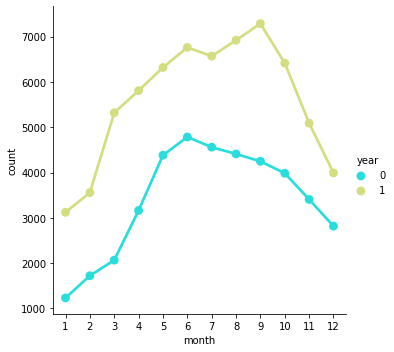

In [9]:
# Plot trend
sns.catplot(col_month,col_count,hue=col_year,data=data_bike_day, ci=None, kind='point', palette='rainbow')

#### 2.2.3 Plot relation between temperature and number of rented bikes

* Make sure data is plausible
* Expected plot contains one peak (optimal biking temperature)

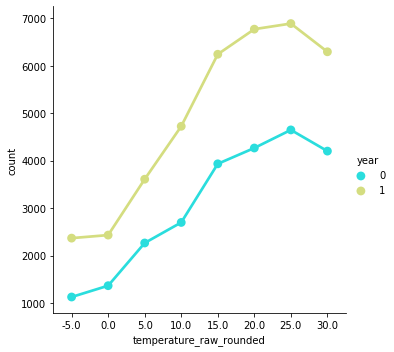

In [10]:
# Plot trend
sns.catplot(col_temperature_raw_rounded,col_count,hue=col_year,data=data_bike_day, ci=None, kind='point', palette='rainbow')

#### 2.2.4 Plot relation between weather situation and number of rented bikes

* Make sure data is plausible
* Expected plot indicates that there are significantly more rentals on day having good weather (clear or misty) 
  * 1: Clear, Few clouds, Partly cloudy, Partly cloudy
  * 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
  * 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
  * 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog

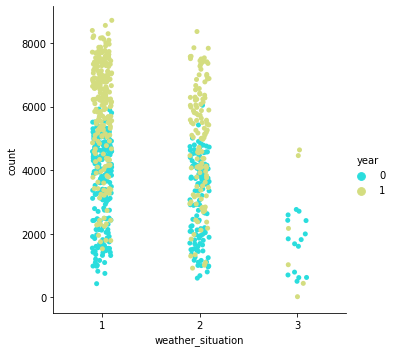

In [11]:
# Plot trend
sns.catplot(col_weather_situation,col_count,hue=col_year,data=data_bike_day, ci=None, kind='strip', palette='rainbow')

#### 2.2.4 Plot correlation matrix of some attributes

* Expected matrix contains the following correlations
  * strong correlation between _temperature_ and _apparent temperature_

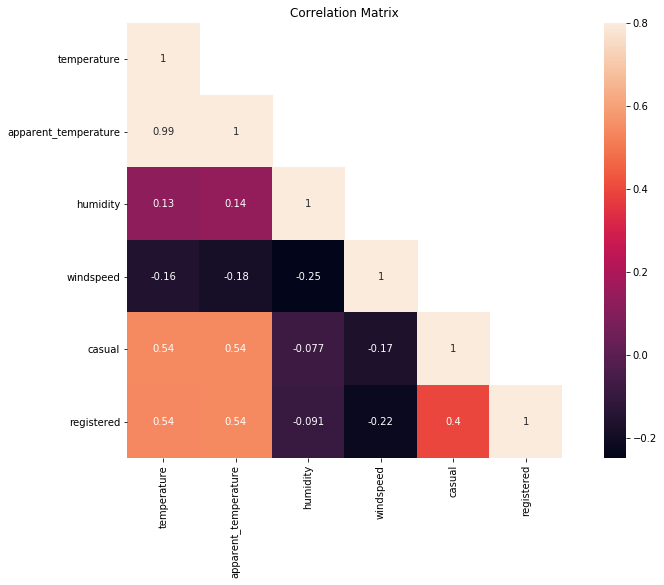

In [12]:
correlationMatrix=data_bike_day[[col_temperature,col_apparent_temperature,col_humidity,col_windspeed,col_casual,col_registered]].corr()
mask=np.array(correlationMatrix)
mask[np.tril_indices_from(mask)]=False

fig,ax=plt.subplots(figsize=(15,8))
sns.heatmap(correlationMatrix,mask=mask,vmax=0.8,square=True,annot=True,ax=ax)
ax.set_title('Correlation Matrix')
plt.show()

## 3 Preprocess data

### 3.1 One-hot-encode categorical data

* The feature _weekday_ is currently label-encoded which implies an order
* The feature _weather_situation_ is currently label-encoded which implies an order

In [13]:
# Define columns to be one-hot encoded
columns_one_hot_encoded = [col_season, col_year, col_month, col_weekday, col_weather_situation]

# One-hot encode columns 
for column in columns_one_hot_encoded:
    data_bike_day = pd.concat([data_bike_day,pd.get_dummies(data_bike_day[column], prefix=column)],axis=1)

data_bike_day.head()

,instant,datetime,season,year,month,holiday,weekday,workingday,weather_situation,temperature,...,weekday_0,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weather_situation_1,weather_situation_2,weather_situation_3
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,...,0,0,0,0,0,0,1,0,1,0
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,...,1,0,0,0,0,0,0,0,1,0
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,...,0,1,0,0,0,0,0,1,0,0
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,...,0,0,1,0,0,0,0,1,0,0
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,...,0,0,0,1,0,0,0,1,0,0


### 3.2 Enhance data

#### 3.2.1 Calculate date since start

In [14]:
# Calculate start date
# start_date = data_bike_day[col_datetime].min()
# data_bike_day[col_days_since_start] = data_bike_day.apply(lambda row: (datetime.datetime.strptime(row[col_datetime], '%Y-%m-%d')-datetime.datetime.strptime(start_date, '%Y-%m-%d')).days, axis = 1) 
# data_bike_day.head()

### 3.3 Drop columns

* The following columns need to be dropped
  * Indices
    * _instant_ since it does not contain any information besides the order
  * Columns which cannot be used directly
    * _datetime_ which is formatted ```yyyy-mm-dd```
  * Columns which are one-hot encoded
    * _weekday_
    * _weather situation_

In [15]:
# Drop index and unusable columns
data_bike_day.drop([col_instant],axis=1, inplace=True)
data_bike_day.drop([col_datetime],axis=1, inplace=True)

# Drop one-hot encoded columns
for column in columns_one_hot_encoded:
    data_bike_day.drop([column],axis=1, inplace=True)

# Drop raw-value columns
for column in columns_raw_values:
    data_bike_day.drop([column],axis=1, inplace=True)

data_bike_day.head()

,holiday,workingday,temperature,apparent_temperature,humidity,windspeed,casual,registered,count,season_1,...,weekday_0,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weather_situation_1,weather_situation_2,weather_situation_3
0,0,0,0.344167,0.363625,0.805833,0.160446,331,654,985,1,...,0,0,0,0,0,0,1,0,1,0
1,0,0,0.363478,0.353739,0.696087,0.248539,131,670,801,1,...,1,0,0,0,0,0,0,0,1,0
2,0,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349,1,...,0,1,0,0,0,0,0,1,0,0
3,0,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562,1,...,0,0,1,0,0,0,0,1,0,0
4,0,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600,1,...,0,0,0,1,0,0,0,1,0,0


### 3.4 Normalize data

_tbd_

## 4 Split data into _training_ and _test_

In [16]:
# Define columns
data_bike_day_x = data_bike_day.drop([col_count, col_casual, col_registered], axis=1)
data_bike_day_y = data_bike_day[[col_count]]

# Split training data and test data
test_size = 0.3
random_state = 42

x_train, x_test, y_train, y_test = train_test_split(data_bike_day_x, data_bike_day_y, test_size=test_size, random_state=random_state)

In [17]:
# Show splitted data
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(511, 34) (220, 34) (511, 1) (220, 1)


In [18]:
x_train.head()

,holiday,workingday,temperature,apparent_temperature,humidity,windspeed,season_1,season_2,season_3,season_4,...,weekday_0,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weather_situation_1,weather_situation_2,weather_situation_3
223,0,1,0.708333,0.654042,0.415000,0.125621,0,0,1,0,...,0,0,0,0,0,1,0,1,0,0
684,0,1,0.321667,0.324492,0.620417,0.152987,0,0,0,1,...,0,0,0,0,1,0,0,0,1,0
685,0,1,0.345000,0.347204,0.524583,0.171025,0,0,0,1,...,0,0,0,0,0,1,0,1,0,0
163,0,1,0.635000,0.601654,0.494583,0.305350,0,1,0,0,...,0,1,0,0,0,0,0,1,0,0
394,0,1,0.269167,0.262625,0.400833,0.215792,1,0,0,0,...,0,1,0,0,0,0,0,1,0,0


In [19]:
y_train.head()

,count
223,4905
684,5445
685,5698
163,5020
394,3624


## 5 Initialize model

### 5.1 Linear Regression

In [20]:
linear_regression = linear_model.LinearRegression()

### 5.2 Decission Tree Regressor

In [21]:
decision_tree_regressor = DecisionTreeRegressor(min_samples_split=2,max_leaf_nodes=10)

### 5.3 Random Forest Regressor

In [22]:
random_forest_regressor = RandomForestRegressor(n_estimators=200)

### 5.4 Lasso

In [ ]:
lasso = linear_model.Lasso(alpha=0.2)

## 6 Train model

### 6.1 Linear Regression

In [23]:
linear_regression.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

### 6.2 Decission Tree Regressor

In [24]:
decision_tree_regressor.fit(x_train, y_train)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
                      max_leaf_nodes=10, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=None, splitter='best')

### 6.3 Random Forest Regressor

In [25]:
random_forest_regressor.fit(x_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=200,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

### 6.4 Lasso

In [ ]:
lasso.fit(x_train, y_train)

## 7 Evaluate model

In [26]:
def evaluateModel(predicted_values, expected_values):
    print("explained variance score", explained_variance_score(expected_values, predicted_values))
    print("·············· max error", max_error(expected_values, predicted_values))
    print("···· mean absolute error", mean_absolute_error(expected_values, predicted_values))
    print("····· mean squared error", mean_squared_error(expected_values, predicted_values))
    print("· mean squared log error", mean_squared_log_error(expected_values, predicted_values))

### 7.1 Linear Regression

In [27]:
linear_regression_prediction = linear_regression.predict(x_test)
evaluateModel(linear_regression_prediction, y_test)

explained variance score 0.8489515910006783
·············· max error 3882.0
···· mean absolute error 583.9818181818182
····· mean squared error 601829.2636363637
· mean squared log error 0.17706586692845389


### 7.2 Decision Tree Regressor

In [28]:
decision_tree_regressor_prediction = decision_tree_regressor.predict(x_test)
evaluateModel(decision_tree_regressor_prediction, y_test)

explained variance score 0.7846074121088655
·············· max error 5462.227272727273
···· mean absolute error 667.8169018859927
····· mean squared error 857101.200322385
· mean squared log error 0.20689945013666777


### 7.3 Random Forest Regressor

In [29]:
random_forest_regressor_prediction = random_forest_regressor.predict(x_test)
evaluateModel(random_forest_regressor_prediction, y_test)

explained variance score 0.8882334648956042
·············· max error 4199.265
···· mean absolute error 450.1204318181819
····· mean squared error 445008.86227011366
· mean squared log error 0.1609706278378064


### 7.4 Lasso

In [ ]:
lasso_prediction = lasso.predict(x_test)
evaluateModel(lasso_prediction, y_test)